In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 准确率
import numpy as np
import urllib.request
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn
import joblib
import hdf5storage
import itertools
import h5py
from torch.utils.data import DataLoader, Dataset
import seaborn as sns
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother
from tsmoothie.utils_func import sim_seasonal_data
from tsmoothie.smoother import DecomposeSmoother
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib
import pickle
from sklearn.datasets import load_iris
import numpy


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 生成随机数据
# np.random.seed(0)
# data = np.random.normal(0, 1, 100)

# # 计算均值和方差
# mean = np.mean(data)
# variance = np.var(data)

# fig, ax = plt.subplots()
# ax.boxplot(data)

# # 添加标签
# ax.set_xticklabels(['Data'])

# # 添加标题和注释
# ax.set_title('Box Plot of Data')
# ax.annotate('Mean: {:.2f}'.format(mean), xy=(1, mean), xytext=(1.2, mean))
# ax.annotate('Variance: {:.2f}'.format(variance), xy=(1, variance), xytext=(1.2, variance))

# plt.show()

In [63]:
path = ['../data/All_MM_MA_ganlanshi.mat', '../data/All_MM_MA_ganlanshi_08_09.mat']

def read_data(path):
    """

    read_data数据处理

    path:  数据所在的文件路径

    return: 返回值是处理后的结果
    """
    f = hdf5storage.loadmat(path)

    if path == '../data/All_MM_MA_ganlanshi.mat' :
        element_name = 'MM_average_MA_01'
    elif path == '../data/All_MM_MA_ganlanshi_08_09.mat':
        element_name = 'MM_average_MA_01'

    src_data = np.array(f[element_name])

    return src_data

def show_box(path_1, path_2, dim):
    # 创建一个包含两个子图的画布
    fig, ax = plt.subplots(dim, 1, figsize=(16, 16))
    for i in range(dim) :
        temp_data_01 = read_data(path_1)[i]
        temp_data_02 = read_data(path_2)[i]

        all_data = [temp_data_01, temp_data_02]
        # 绘制第一个维度的箱线图
        # sns.boxplot(data=all_data, ax=ax[i])
        boxprops = dict(color='lightblue', linewidth=2)  # 箱体属性
        whiskerprops = dict(color='blue', linewidth=2)  # 触须属性
        flierprops = dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='black')  # 异常值属性
        ax[i].boxplot(all_data, boxprops=boxprops, whiskerprops=whiskerprops, flierprops=flierprops, showfliers=False)
        ax[i].set_title('Box Plot of Data Dimension {}'.format(i))
        # ax.set_xticklabels(['b', 'c'])
    
    plt.tight_layout()
    plt.show()

def show_box_ones(path_1, path_2, dim):
    # 创建一个包含两个子图的画布
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    temp_data_01 = read_data(path_1)[dim]
    temp_data_02 = read_data(path_2)[dim]

    all_data = [temp_data_01, temp_data_02]

    # 绘制第一个维度的箱线图
    # sns.boxplot(data=all_data, ax=ax[i])
    boxprops = dict(color='lightblue', linewidth=2)  # 箱体属性
    whiskerprops = dict(color='blue', linewidth=2)  # 触须属性
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='black')  # 异常值属性
    boxplot_dict = ax.boxplot(all_data, boxprops=boxprops, whiskerprops=whiskerprops, flierprops=flierprops, showfliers=False)
   
    # positions = range(1, len(all_data)+1)
    
    print(len(all_data))
    
    # for pos, data in zip(positions, all_data):
    #     mean = np.mean(data)
    #     var = np.var(data)
    #     # ax.axhline(mean, xmin=pos-0.2, xmax=pos+0.2, color='r', linestyle='dashed', linewidth=1, label=f'均值 = {mean:.2f}')
    #     ax.text(pos, mean+0.05, f'方差 = {var:.2f}', ha='center', va='bottom', color='black')
   
    # ax.set_title('Box Plot of Data Dimension {}'.format(dim))
    # # ax.set_xticklabels(['b', 'c'])

    plt.tight_layout()
    plt.show()

def show_kde(path_1, path_2,dim):
    # 创建一个包含两个子图的画布
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    temp_data_01 = read_data(path_1)[dim]
    temp_data_02 = read_data(path_2)[dim]
    # all_data = [temp_data_01, temp_data_02]

    # 使用seaborn的kdeplot函数画出两组数据的核密度估计图
    sns.kdeplot(data=temp_data_01, ax=ax, label='Data 1')
    sns.kdeplot(data=temp_data_02, ax=ax, label='Data 2')

    # 设置图形标题和坐标轴标签
    ax.set_title('KDE Plot')
    ax.set_xlabel('X')
    ax.set_ylabel('Density')
  
    # 显示图例
    ax.legend()

    # 显示图形
    plt.show()


2


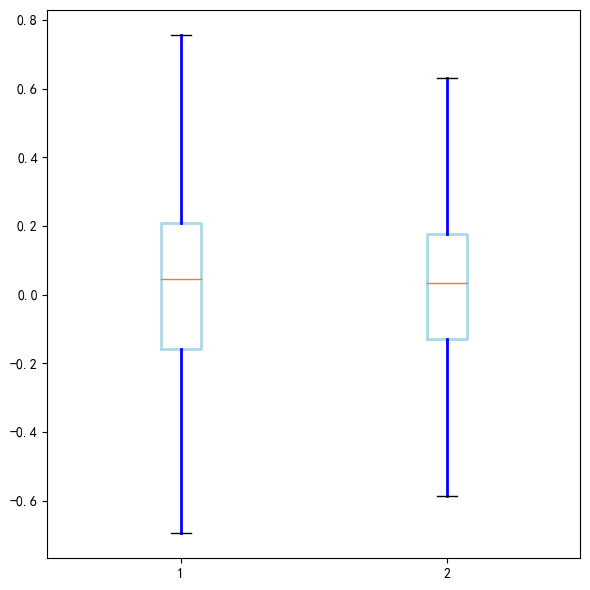

In [64]:
# show_box(path[0], path[1], 5)
show_box_ones(path[0], path[1],12) 

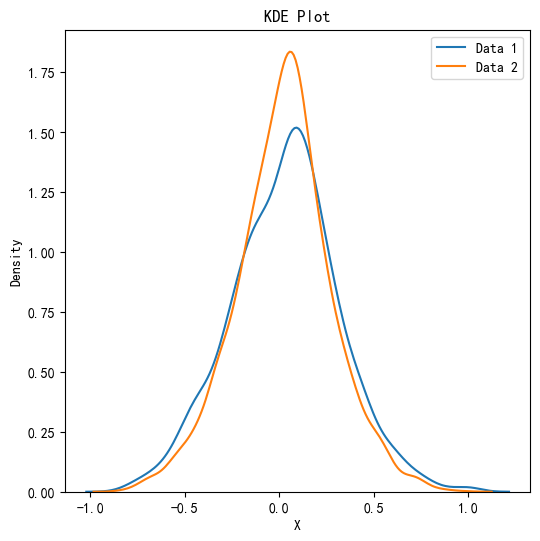

In [67]:
show_kde(path[0], path[1],12)

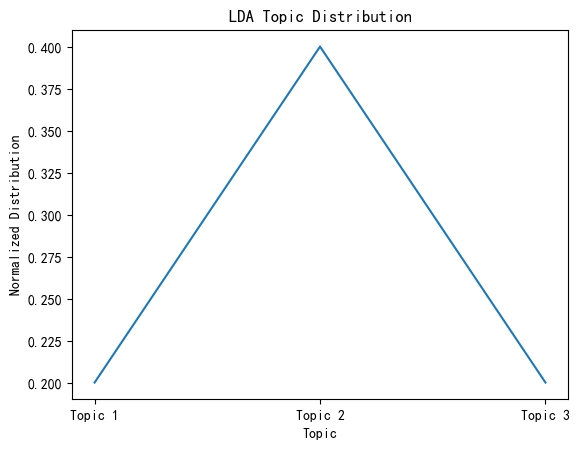

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 假设有三个主题的归一化分布
topic_distribution = np.array([0.2, 0.4, 0.2])

# 生成x轴坐标
x = np.arange(len(topic_distribution))

# 绘制曲线图
plt.plot(x, topic_distribution)
plt.xticks(x, ['Topic 1', 'Topic 2', 'Topic 3'])
plt.xlabel('Topic')
plt.ylabel('Normalized Distribution')
plt.title('LDA Topic Distribution')
plt.show()

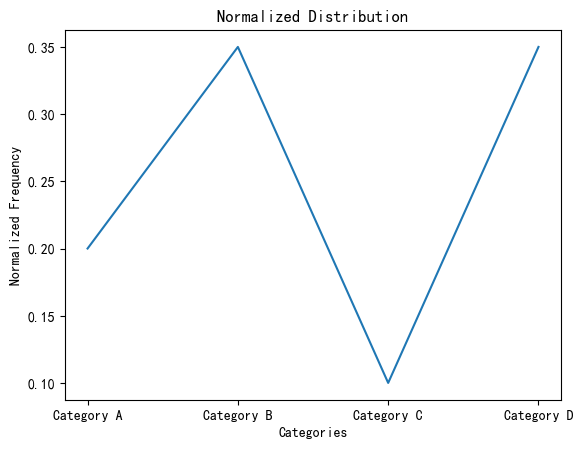

In [23]:
import matplotlib.pyplot as plt

# 假设有4个类别的频率分布
categories = ["Category A", "Category B", "Category C", "Category D"]
frequency = [0.2, 0.35, 0.1, 0.35]

# 归一化频率
normalized_frequency = [f / sum(frequency) for f in frequency]

# 绘制归一化分布
# plt.bar(categories, normalized_frequency)
plt.plot(categories, normalized_frequency)
plt.xlabel("Categories")
plt.ylabel("Normalized Frequency")
plt.title("Normalized Distribution")

plt.show()